## Amrithraj K P
## 2311022

In [13]:
from Amrith_lib import *
import matplotlib.pyplot as plt

# Question-1

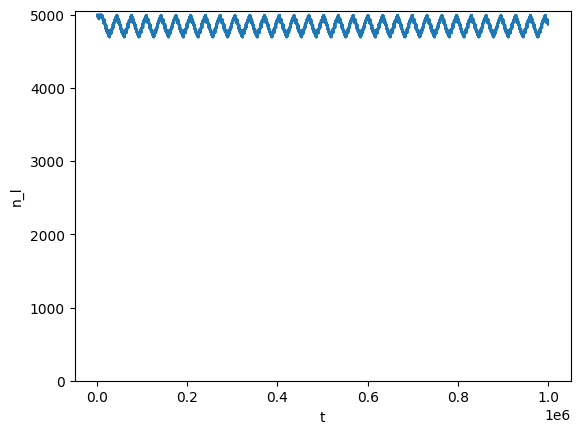

average no. of particles in the left side is : 4845.063694681527


In [197]:
def evolve_system(N=5000,t_fin=1000000):
    nl=N
    nr=0
    nl_out=[N]
    nr_out=[0]
    rnd_lst = lcg_rng(x0=0.1,n=t_fin,range=[0,1])
    i=0
    while i<t_fin:
        if rnd_lst[i]<0.5:
            if nl>0:
                nl= nl - 1
                nr+=1
            elif nl==0:
                nr-=1
                nl+=1
            nl_out.append(nl)
            nr_out.append(nr)
        else:
            if nl<N:
                nr = nr - 1
                nl+=1
            elif nl==N:
                nl-=1
                nr+=1
            nl_out.append(nl)
            nr_out.append(nr)
        i+=1
    return nl_out,nr_out
nl,nr = evolve_system()
t=np.arange(0,1000001,1)
plt.plot(t,nl)
plt.ylim(0,5050)
plt.ylabel('n_l')
plt.xlabel('t')
plt.show()
print(f'average no. of particles in the left side is : {np.average(nl[4*len(nl)//5::])}')



# Question-2

In [6]:
A1 = read_matrix("qn2_matrix.txt")
B1 = read_matrix("qn2_vect.txt")

sol = gauss_siedel_solve(A1,B1, [2,2,2,2,3,5], eps=10**(-6))
print(f'The solution is :{sol[0]}')

The solution is :[1.0000002334558182, 1.0000001992670051, 1.000000085042514, 1.0000001409030506, 1.0000001202682767, 1.0000000513276976]


# Question-3

In [9]:
# F(x) = F - xe^(x)

def F(x):
    return 2.5 - x*np.exp(x)

def dF(x):
    return -np.exp(x) - x*np.exp(x)

print(f'The distance the spring can be stretched is : {newton_raphson_root(F,dF,accur=10**-6,x0_guess=10)[0]}')

The distance the spring can be stretched is : 0.958586356728703


# Question-4

In [104]:
# com = integral(density(x) dx)/L

def density(x):
    return x**2

integral = gaussian_quadrature_integ(density,[0,2],5)

print(f'The position of the center of mass is at x = {integral/2}')


The position of the center of mass is at x = 1.3333333333333335


# Question-5

maximum height without air resistance = 5
max height with air resistance is 4.934317509223526


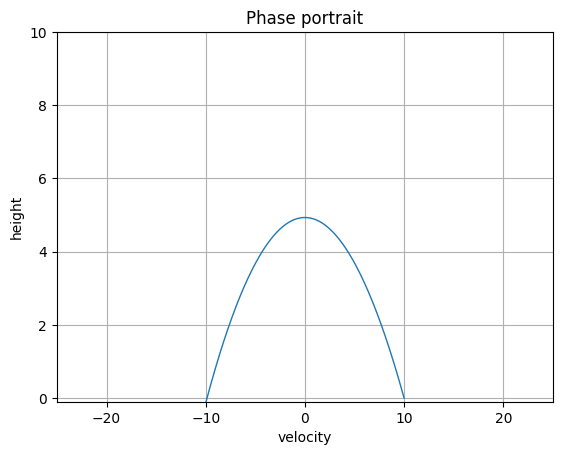

In [70]:
def dxdt(x_vec,t):
    x = x_vec[0]
    v = x_vec[1]
    return [v, -0.02*v - 10]

sol = RK4_solve(dxdt,[0,10],[0,20],step_size=0.01)
t=sol[0]
x=[sol[1][i][0] for i in range(len(sol[1]))]
v=[sol[1][i][1] for i in range(len(sol[1]))]

# maximum height without air resistance = 5
max_height = max(i for i in x)
print('maximum height without air resistance = 5')
print(f'max height with air resistance is {max_height}')

plt.plot(v,x,linewidth=1)
plt.xlabel('velocity')
plt.ylabel('height')
plt.grid(True)
plt.ylim(-0.1,10)
plt.xlim(-25,25)
plt.title('Phase portrait')
plt.show()




# Question-6


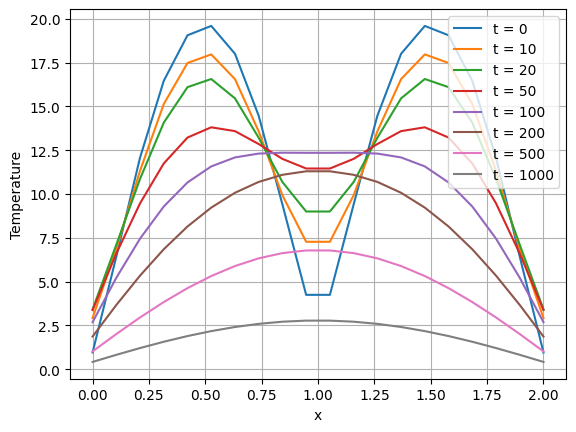

In [92]:
def heateqn_soln(initial,t_range=[0,4],n_t=5000):
    x_step=2/len(initial)
    n_x=len(initial)
    t0,tf=t_range
    t_step=(tf-t0)/n_t
    A=make_zeros(n_x)
    alpha=t_step/(x_step**2)
    if alpha>0.5:
        print(f'alpha={alpha}')
        return
    ##constructing A
    for i in range(n_x):
        for j in range(n_x):
            if i==j:
                A[i][j]= 1 - 2*alpha
            if i==j+1 or j == i+1:
                A[i][j] = alpha
    An=A
    sol=[]
    for i in range(n_t-1):
        An=matrix_mult(An,A)
        out=[]
        for i in range(n_x):
            temp=0
            for j in range(n_x):
                temp+=An[i][j]*initial[j]
            out.append(temp)
        sol.append(out)
    
    return sol

initial_cond=[0]*20
x=np.linspace(0,2,20)
for i in range(len(initial_cond)):
    initial_cond[i] = 20 * abs(np.sin(np.pi * x[i]))
y=heateqn_soln(initial_cond)

temp_num=len(y)
time_steps=[0,10,20,50,100,200,500,1000]
for k in time_steps:
    plt.plot(x,y[k],label=f't = {k}')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()



# Question - 7

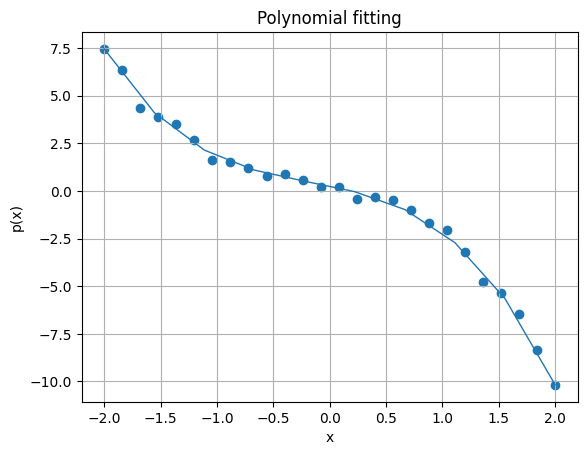

The polynomial is: [0.25462950721153677, -1.1937592138092228, -0.45725541238294554, -0.8025653910658201, 0.013239427477391263]


In [86]:
def polyfit(x_data, y_data, n, sigma=None):
    if sigma == None:
        sigmas = [1] * len(x_data)
    else:
        sigmas = sigma

    A = make_zeros(n)
    B = []
    for i in range(n):
        for j in range(n):
            temp = sum((x_data[k]) ** (i + j) for k in range(len(x_data)))
            A[i][j] = temp

        temp2 = sum(((x_data[k]) ** (i) * y_data[k]) for k in range(len(x_data)))
        B.append(temp2)
    
    out = matrix_vec_mult(matrix_inverse(A),B)#gauss_siedel_solve(A, B, [1] * n, 10**-6)[0]
    return out

matrix_7 = read_matrix('qn7_x.txt')
x_data = [matrix_7[i][0] for i in range(0,len(matrix_7),2)]
y_data = [matrix_7[i+1][0] for i in range(0,len(matrix_7),2)]
# print(y_data)

polynomial = polyfit(x_data,y_data,n=5)

def pol(x):
    out = 0
    for i in range(len(polynomial)):
        out += polynomial[i] * (x**i)
    return out

x = np.linspace(-2,2,10)
poly = [pol(i) for i in x]

plt.plot(x,poly,linewidth=1)
plt.scatter(x_data,y_data)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.title('Polynomial fitting')
plt.show()

print(f'The polynomial is: {polynomial}')
#[a0,a1,a2,a3,a4]
